# ĐỀ TÀI TỐT NGHIỆP: ỨNG DỤNG MÔ HÌNH ARIMA VÀO THỊ TRƯỜNG CHỨNG KHOÁN VIỆT NAM TRONG GIAI ĐOẠN 2021 - 2023

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats.distributions import chi2
from pmdarima.arima import auto_arima
from vnstock import *
import warnings
from sklearn import metrics
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2023-08-19 12:09:27.187241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## I. Tính cần thiết của đề tài

Thị trường chứng khoán, tiền ảo... là một kênh đầu tư nhằm tìm kiếm lợi nhuận đang được các nhà đầu tư quan tâm. Đặc biệt trong giai đoạn năm từ năm 2021 đến nay, lượng nhà đầu tư tham gia vào thị trường càng nhiều, thể hiện qua các thông tin sau:
- Lượng đăng ký tài khoản giao dịch trên thị trường ngày càng tăng. Tính đến tháng 5/2023, số lượng TKGD trong thị trường trong nước là 7.121.301 tài khoản, số lượng TKGD thị trường nước ngoài là 43.686 tài khoản.
- Trong giai đoạn 2021 đến nay, sự lây lan của dịch Covid đã làm cho nền kinh tế bị ảnh hưởng, điều này làm cho cách hoạt động về dịch vụ, sản xuất bị đình trệ. Vì vậy, các cá nhân và tổ chức mong muốn tìm kiếm đến một kênh đầu tư có thể tạo lợi nhuận một cách ổn định.

Tuy nhiên, mặc dù thị trường chứng khoán là cơ hội của nhà đầu tư tìm kiếm lợi nhuận, nhưng nó cũng tồn tại các rủi ro khiến các nhà đầu tư thua lỗ, cụ thể như:
- Chỉ có ít hơn 10% nhà đầu tư trên thị trường có thể tạo ra lợi nhuận ổn định trên thị trường chứng khoán, trong khi có rất nhiều nhà đầu tư thua lỗ và rút lui khỏi thị trường chứng khoán
- Trong giai đoạn 2021 đến nay, thị trường chứng khoán VNINDEX liên tục thay đổi liên tục đỉnh và đáy. Đặc biệt trong năm 2022, các nhà đầu tư cá nhân và tổ chức rút tiền nhằm phục vụ cho việc đầu tư vào sản xuất, kinh doanh.


    ![anh](VNINDEX.png)

Dựa vào các yếu tố trên, mục tiêu của đồ án là tạo ra một mô hình để hỗ trợ nhà đầu tư đưa ra quyết định nhằm giảm thiểu rủi ro và tối đa hóa lợi nhuận kỳ vọng trên thị trường này
    

## II. Các khái niệm cơ bản về mô hình AR, MA, ARMA và ARIMA trong dữ liệu chuỗi thời gian

### 1. Giới thiệu về chuỗi thời gian (Time series).

Mô hình này chuỗi thời gian (time series) là mô hình được áp dụng trên các chuỗi đặc thù có yếu tố thời gian. Mô hình chuỗi thời gian thường dự báo dựa trên giả định rằng các qui luật trong quá khứ sẽ lặp lại ở tương lai. Một mô hình chuỗi thời gian thường dự báo dựa trên giả định rằng các qui luật trong quá khứ sẽ lặp lại ở tương lai. Do đó xây dựng mô hình chuỗi thời gian là chúng ta đang mô hình hóa mối quan hệ trong quá khứ giữa biến độc lập (biến đầu vào) và biến phụ thuộc (biến mục tiêu). Dựa vào mối quan hệ này để dự đoán giá trị trong tương lai của biến phụ thuộc.

Các dự báo chuỗi thời gian có tính ứng dụng cao và được sử dụng rất nhiều lĩnh vực như tài chính ngân hàng, chứng khoán, bảo hiểm, thương mại điện tử, marketing, quản lý chính sách. Bên dưới là một số ứng dụng của dự báo chuỗi thời gian:

- Dự báo nhu cầu thị trường để lập kết hoạch sản xuất kinh doanh cho hãng.
- Dự báo lợi suất tài sản tài chính, tỷ giá, giá cả hàng hóa phái sinh để thực hiện trading hiệu quả trong market risk.
- Dự báo giá chứng khoán, các chuỗi lợi suất danh mục để quản trị danh mục đầu tư.
- Dự báo giá bitcoin, giá dầu mỏ, giá gas,…
- Dự báo nhiệt độ, lượng mưa để lập kế hoạch sản xuất nông, lâm, ngư nghiệp.

### 2. Khái niệm về ACF, PCF

Các công cụ chủ yếu để nhận dạng là hàm tự tương quan (ACF), hàm tự tương quan riêng phần (PACF), và các biểu đồ tương quan vẽ dựa vào các hàm này. Đây là công cụ dùng để tính toán sự tương quan giữa giá trị hiện tại và các giá trị trong quá khứ. Về cơ bản, tương quan riêng phần (ACF) và tự tương quan riêng phần (PACF) có cách tính tương đồng nhau nhưng tự tương quan riêng phần (PACF) loại trừ đi ảnh hưởng của các giá trị trung gian.

### 3. Mô hình AR (Autoregrestion)

Mô hình AR (Autoregrestion) là mô hình dự đoán giá trị hiện tại của mô hình dựa trên các giá trị trong quá khứ
\begin{equation}
x_t = c + k*x_{t-1} + \varepsilon 
\end{equation}
Trong đó:
- $x_t$: là giá trị của biến dữ liệu tại thời điểm t
- c: là hằng số trong mô hình
- k: hệ số biến thiên của giá trị quá khứ đến giá trị hiện tại
- $x_{t-1}$: giá trị quá khứ của biến dữ liệu tại thời điểm t - 1
- $\varepsilon$ : chênh lệch giữa giá trị dự đoán và giá trị thực tế

### 4. Mô hình MA (Moving Average)

Mô hình MA (Autoregrestion) là mô hình dự đoán giá trị hiện tại của mô hình dựa trên các sai số trong quá khứ
\begin{equation}
x_t = c + k*\varepsilon_{t-1} + \varepsilon_t
\end{equation}
Trong đó:
- $x_t$: là giá trị của biến dữ liệu tại thời điểm t
- c: là hằng số trong mô hình
- k: hệ số biến thiên của sai số trong quá khứ đến giá trị hiện tại
- $\varepsilon_{t-1}$: giá trị quá khứ của biến dữ liệu tại thời điểm t - 1
- $\varepsilon_t$ : chênh lệch giữa giá trị dự đoán và giá trị thực tế

### 4. Mô hình ARMA (Autoregrestion Moving Average)

Mô hình ARMA (Autoregrestion Moving Average) là mô hình kết hợp giữa mô hình AR và MA, dự đoán giá trị hiện tại dựa vào giá trị quá khứ và sai số quá khứ
\begin{equation}
x_t = c + k_1*x_{t-1} + k_2*\varepsilon_{t-1} + \varepsilon_t
\end{equation}
Trong đó:
- $x_t$: là giá trị của biến dữ liệu tại thời điểm t
- c: là hằng số trong mô hình
- k: hệ số biến thiên của giá trị quá khứ đến giá trị hiện tại
- k: hệ số biến thiên của sai số trong quá khứ đến giá trị hiện tại
- $\varepsilon_{t-1}$: giá trị quá khứ của biến dữ liệu tại thời điểm t - 1
- $\varepsilon_t$ : chênh lệch giữa giá trị dự đoán và giá trị thực tế

### 5. Mô hình ARIMA (Autoregrestion Moving Average)

Mô hình ARIMA (Autoregrestion integrated Moving Average) là mô hình cải tiến của mô hình ARMA, dự đoán giá trị hiện tại dựa vào sai phân trong quá khứ và sai số quá khứ
Về cơ bản, Mô hình ARIMA (p, d, q) được tách thành các thành phần bao gồm giá trị quá khứ, bậc sai phân và sai số trong quá khứ

Ta có:

ARIMA (p, 0, 0) = AR(p)

ARIMA (0, 0, q) = MA(q)





## III. Áp dụng mô hình ARIMA để dự đoán thị trường chứng khoán Việt Nam.
### 1. Thu thập dữ liệu.

Để dự đoán dữ liệu được chính xác nhất, học viên lựa chọn một vài mã cổ phiếu trên thị trường Việt Nam thỏa mãn các tiêu chí sau:
- Thuộc nhóm cổ phiếu VN30, có vốn hóa cao, khối lượng giao dịch trên thị trường lớn.
- Các cổ phiếu thu thập được sẽ thuộc các nhóm ngành khác nhau để tạo nên tính đa dạng của cổ phiếu.
- Dữ liệu thu thập phải đầy đủ từ năm 2021 đến nay

Dựa vào các tiêu chí trên, học viên lựa chọn một số mã như sau:

In [4]:
df_close = pd.read_csv('DataVN30.csv')
df_close['Date'] = df_close['Date'].astype('datetime64[ns]')
df_close.set_index('Date', inplace=True)
df_close.tail()

,STB,VIC,SSI,MSN,FPT,HAG,KDC,EIB,DPM,VNM,...,CTG,SJS,QCG,PVD,CII,SBT,VSH,KDH,DIG,GMD
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-21,29400.0,52400.0,26000.0,76100.0,73754.0,7970.0,64800.0,20850.0,33200.0,66300.0,...,29150.0,42400.0,9520.0,24900.0,18800.0,15700.0,41150.0,30600.0,21700.0,51800.0
2023-06-22,30000.0,52400.0,26100.0,76300.0,73496.0,8080.0,65000.0,21100.0,34350.0,66900.0,...,29450.0,43100.0,10150.0,25000.0,19050.0,15800.0,41200.0,31350.0,23050.0,51800.0
2023-06-23,30300.0,52000.0,26000.0,77300.0,73152.0,8040.0,65100.0,21100.0,34350.0,66900.0,...,29250.0,42000.0,10850.0,24150.0,18850.0,15700.0,41300.0,31650.0,22800.0,52700.0
2023-06-26,29600.0,52200.0,25800.0,77700.0,73754.0,7950.0,65200.0,21100.0,34000.0,66600.0,...,29250.0,41600.0,10100.0,24500.0,19000.0,15500.0,41500.0,31450.0,23100.0,52500.0
2023-06-27,29500.0,52400.0,26300.0,77500.0,73443.0,7900.0,65700.0,20750.0,33800.0,66500.0,...,29050.0,42200.0,9400.0,24750.0,18000.0,15500.0,41600.0,31500.0,22850.0,52900.0


### 2. Đánh giá và xử lý dữ liệu
#### a. Đánh giá dữ liệu
Để đánh giá dữ liệu thu thập được, ta dựa vào biểu đồ biến động giá cổ phiếu trong giai đoạn từ năm 2021 đến nay, giá trị sử dụng trong biểu đồ là giá trị trung bình của các cổ phiếu trong nhóm VN30

In [5]:
df = pd.read_csv('Data VN30.csv')
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,25/07/2023,"1,199.43","1,195.13","1,202.39","1,194.89",243.48K,0.69%
1,24/07/2023,"1,191.21","1,191.30","1,194.04","1,182.45",255.09K,0.39%
2,21/07/2023,"1,186.60","1,167.74","1,186.60","1,166.55",243.82K,1.57%
3,20/07/2023,"1,168.26","1,164.69","1,168.26","1,159.64",218.94K,0.26%
4,19/07/2023,"1,165.19","1,169.64","1,171.07","1,165.19",198.67K,-0.14%


In [6]:
df.columns = ['Date', 'Close', 'Open', 'Up', 'Down', 'Volumn', '% Change']
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.set_index('Date', inplace=True)
df = df.sort_index()
for code in ['Close', 'Open', 'Up', 'Down']:
    df[code] = df[code].str.replace(',','').astype(float)
df['Volumn'] = df['Volumn'].str.replace('K','').astype(float)

In [7]:
df = df.asfreq('b')
df = df.fillna(method='ffill')

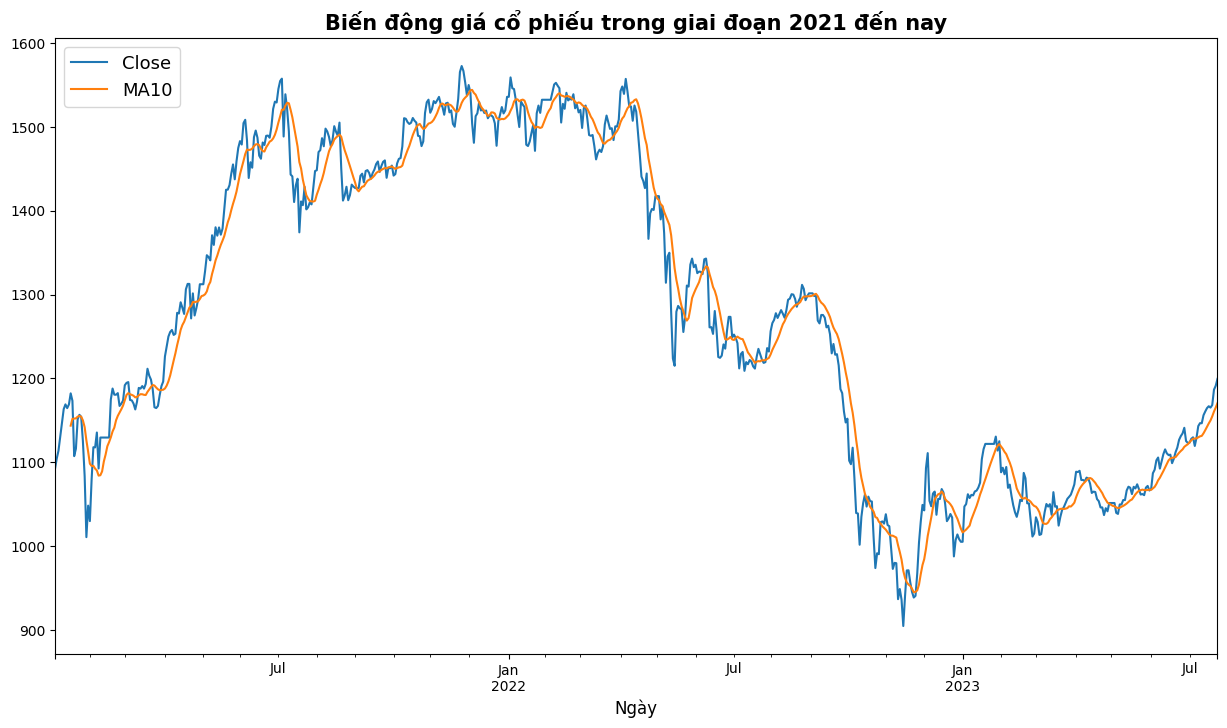

In [8]:
df['MA10'] = df['Close'].rolling(10).mean()
df[['Close', 'MA10']].plot(kind='line', figsize=(15,8))
plt.legend(fontsize = 13, loc = "upper left")
plt.title('Biến động giá cổ phiếu trong giai đoạn 2021 đến nay', fontsize = 15, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.show()

In [9]:
df['Month'] = df.index
df['Month'] = df['Month'].apply(lambda x: str(x)[:7])

Text(0.5, 1.0, 'Khối lượng cổ phiếu lưu hành trên thị trường giai đoạn 2021 - 2023')

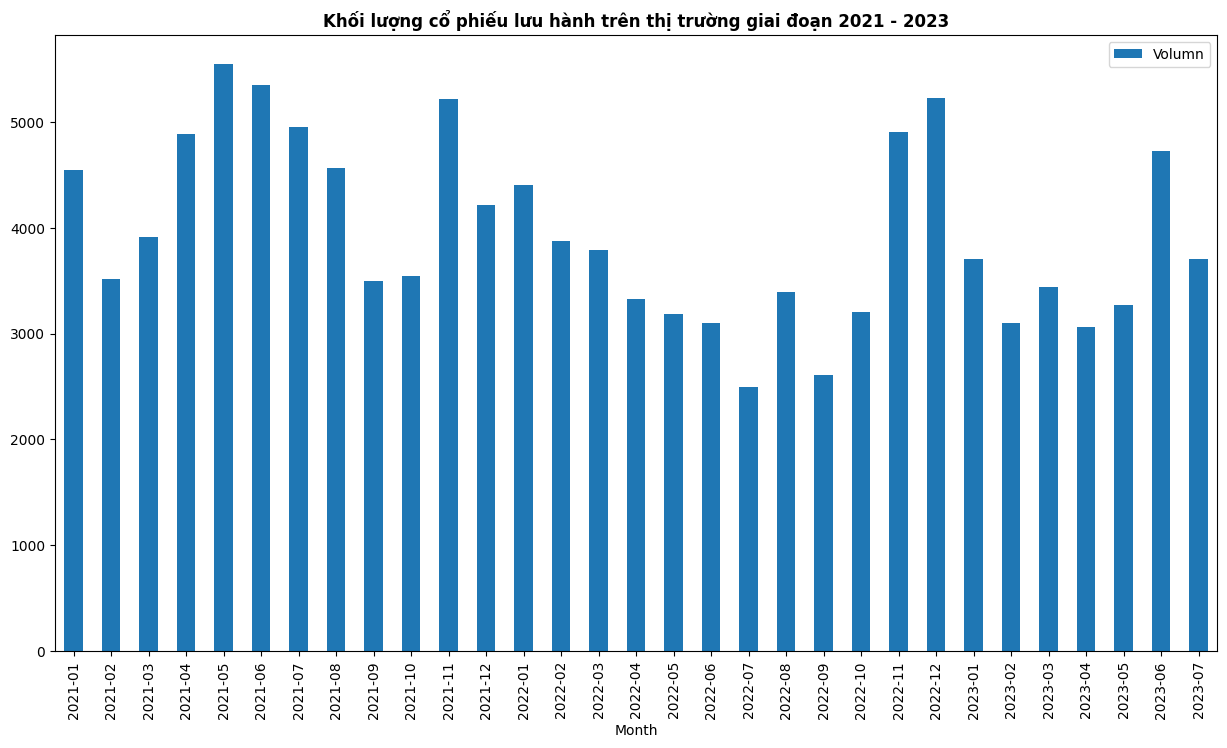

In [10]:
df[['Month', 'Volumn']].groupby('Month').sum().plot(kind='bar', figsize=(15,8))
plt.title('Khối lượng cổ phiếu lưu hành trên thị trường giai đoạn 2021 - 2023', fontsize=12, fontweight='bold')

Dựa vào đồ thị trên, ta thấy: 
Trong giai đoạn 2021 đến giữa năm 2022, cổ phiếu liên tục tăng mạnh từ 30.000 VNĐ lên trên 45.000 VND, gấp 1,5 lần. Tuy nhiên, Trong giai đoạn từ năm 2022 đến đầu năm 2023, cổ phiếu giảm xuống đáy còn 30.000 VND và tăng nhẹ trong đầu năm 2023

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

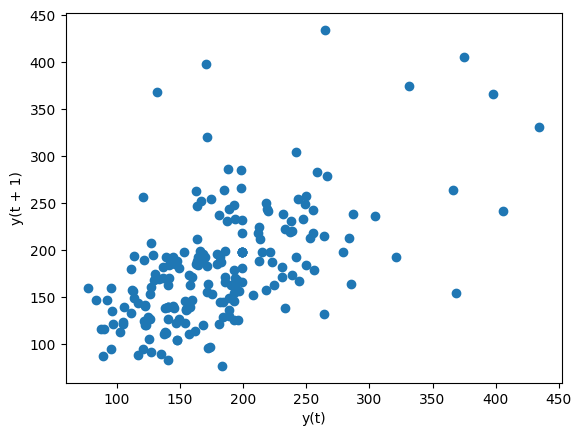

In [11]:
from pandas.plotting import lag_plot
lag_plot(df['Volumn'].tail(200))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

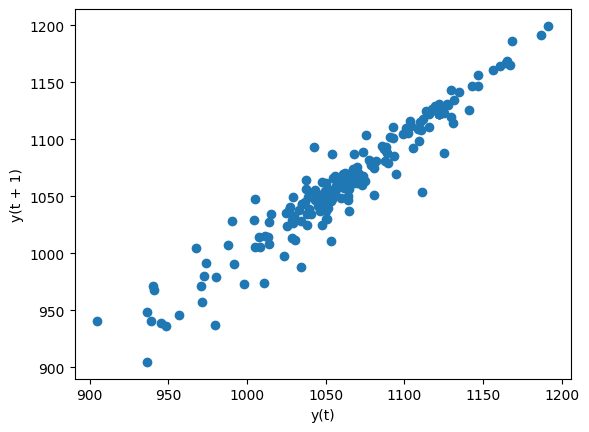

In [12]:
lag_plot(df['Close'].tail(200))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

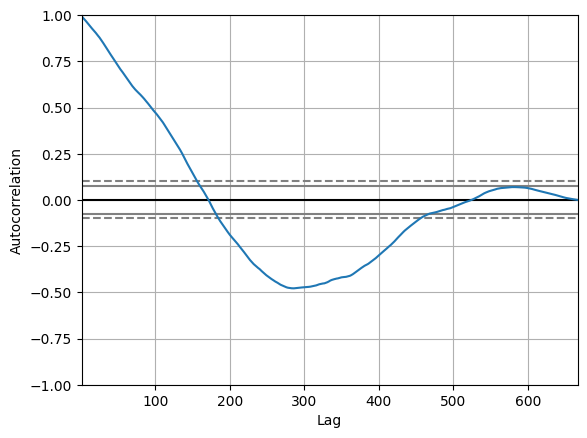

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])

In [14]:
df['Year'] = df['Month'].apply(lambda x: str(x)[:4])
df

,Close,Open,Up,Down,Volumn,% Change,MA10,Month,Year
Date,,,,,,,,,
2021-01-04,1091.87,1072.44,1097.61,1072.44,233.73,1.97%,NaN,2021-01,2021
2021-01-05,1104.30,1090.71,1106.29,1086.07,191.64,1.14%,NaN,2021-01,2021
2021-01-06,1113.72,1105.74,1125.63,1104.99,225.23,0.85%,NaN,2021-01,2021
2021-01-07,1130.59,1113.88,1130.59,1113.88,215.40,1.51%,NaN,2021-01,2021
2021-01-08,1147.86,1131.00,1156.38,1131.00,220.09,1.53%,NaN,2021-01,2021
...,...,...,...,...,...,...,...,...,...
2023-07-19,1165.19,1169.64,1171.07,1165.19,198.67,-0.14%,1149.853,2023-07,2023
2023-07-20,1168.26,1164.69,1168.26,1159.64,218.94,0.26%,1154.735,2023-07,2023
2023-07-21,1186.60,1167.74,1186.60,1166.55,243.82,1.57%,1160.452,2023-07,2023


Calculation profitable performance

In [15]:
profit = df_close.iloc[-1]/df_close.iloc[0]
profit.sort_values(inplace=True)
profit

VIC    0.545828
VNM    0.677148
BVH    0.729058
ITA    0.739653
IJC    0.752492
CII    0.812641
SBT    0.870884
QCG    1.021739
HPG    1.032461
OGC    1.050000
MSN    1.064590
CTG    1.082017
DIG    1.214069
PNJ    1.260353
EIB    1.277002
KDH    1.298594
VCB    1.304700
SSI    1.331915
SJS    1.485915
HAG    1.493384
GMD    1.680005
STB    1.680912
REE    1.694641
KDC    1.827742
PVD    1.888448
FPT    2.041444
DPM    2.309532
VSH    2.602928
dtype: float64

Top 3 cổ phiếu cho lợi nhuận cao nhất

In [16]:
high_profit = list(profit.sort_values().index[-3:])
print('Top 3 CP co loi nhuan cao nhat la: ' + ', '.join(high_profit))

Top 3 CP co loi nhuan cao nhat la: FPT, DPM, VSH


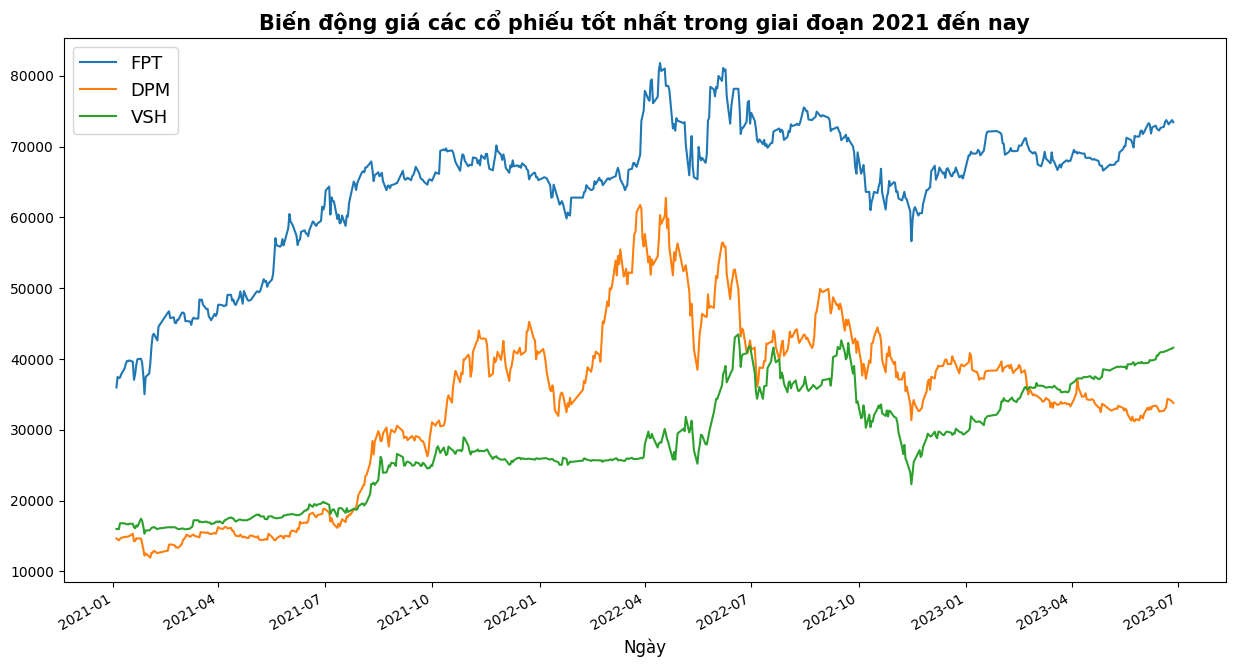

In [17]:
df_close[high_profit].plot(kind='line', figsize=(15,8))
plt.legend(fontsize = 13, loc = "upper left")
plt.title('Biến động giá các cổ phiếu tốt nhất trong giai đoạn 2021 đến nay', fontsize = 15, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.show()

In [18]:
low_profit = list(profit.index[:3])
print('Top 3 CP co rui ro cao nhat la: ' + ', '.join(low_profit))

Top 3 CP co rui ro cao nhat la: VIC, VNM, BVH


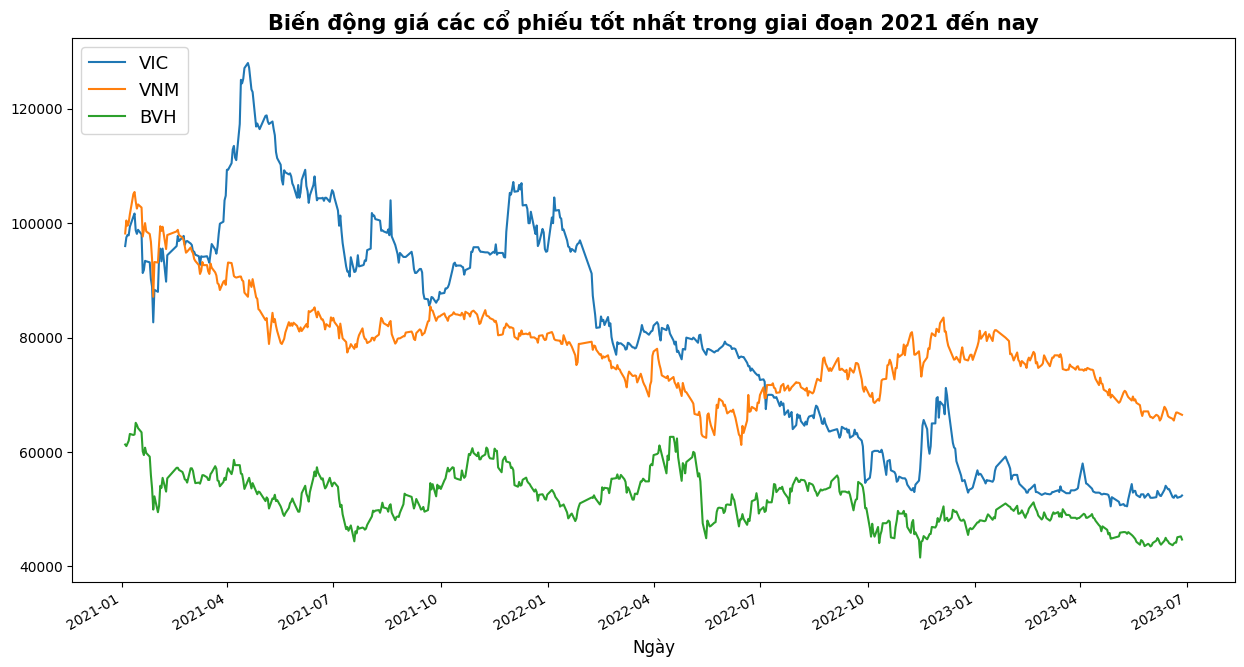

In [19]:
df_close[low_profit].plot(kind='line', figsize=(15,8))
plt.legend(fontsize = 13, loc = "upper left")
plt.title('Biến động giá các cổ phiếu tốt nhất trong giai đoạn 2021 đến nay', fontsize = 15, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.show()

In [20]:
df_close.mean(axis=1).describe()

count      617.000000
mean     39879.027090
std       4477.603089
min      29852.892857
25%      36433.892857
50%      39010.535714
75%      42804.428571
max      50054.500000
dtype: float64

Dựa vào thông tin trên, ta có mô hình sẽ bao gồm 610 số lượng bản ghi và 29 trường. Các trường trong dữ liệu chính là giá của các cổ phiếu trong danh sách VN30

#### b. Xử lý dữ liệu
Từ dữ liệu thu thập ban đầu, ta tiến hành xử lý dử liệu tiền mô hình như sau:

- Đầu tiên, để đảm bảo dữ liệu đầy đủ tại các ngày làm việc trong tuần, ta tiến hành chuyển index của dữ liệu thành các ngày làm việc trong tuần
- Tiếp theo, do biểu đồ giá của các cổ phiếu đang có xu hướng rõ rệt, nên ta có thể thấy dữ liệu của mô hình đang không có tính dừng. Vì vậy, để đảm bảo mô hình có tính dừng, ta thay dữ liệu ban đầu thành phần trăm thay đổi giá cổ phiếu so với ngày liền kề:
\begin{equation}
x = \frac{\mathrm{x_t} }{\mathrm{x_{t-1}} } - 1
\end{equation}
- Để tiến hành thử nghiệm và kiểm tra mô hình được chính xác, ta thực hiện chia mô hình thành hai phần là train và test, trong đó, dữ liệu train là dữ liệu từ đầu năm đến 7 ngày

In [21]:
# Set index is working date
df_close = df_close.asfreq('b')
df_close = df_close.fillna(method='ffill')

# Transform data
df_new = (df_close/df_close.shift(1)-1).dropna(axis=0)

# Split train/test data
size = len(df_close)-8
df_train = df_new.iloc[:size-7]
df_test = df_new.iloc[size-7:size]
df_train1 = df_new.iloc[:size]
df_test1 = df_new.iloc[size:]

#### c. Phương pháp đánh giá mô hình
Để đánh giá mức độ chính xác của mô hình, ta dựa vào chỉ tiêu RMSLE(Root Mean Squared Logarithmic Error).

Chỉ tiêu RMSLE được tính bằng công thức như sau:

\begin{equation}
\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}
\end{equation}

where:

${n}$ is the total number of instances,

$\hat{y}_i$ is the predicted value of the target for instance (i),

$y_i$ is the actual value of the target for instance (i), and,

$log$ is the natural logarithm.
Submission File

Ngoài ra, vì mô hình tạo ra nhằm giúp nhà đầu tư tìm kiếm lợi nhuận. Vì vậy, ta còn đánh giá mô hình dựa vào yếu tố lợi nhuận mà nhà đầu tư kiếm được thông qua việc lựa chọn cổ phiếu dựa trên mô hình

### 3. Mô hình thực nghiệm
#### a. Đánh giá ACF và PACF của mô hình
Để đánh giá mức độ tương quan của dữ liệu quá khứ và dữ liệu hiện tại, ta vẽ sơ đồ ACF và PACF như sau (dùng 2 cổ phiếu mẫu là HPG và VNM):

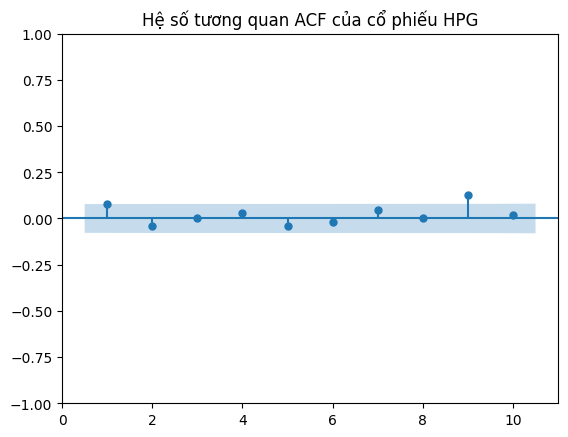

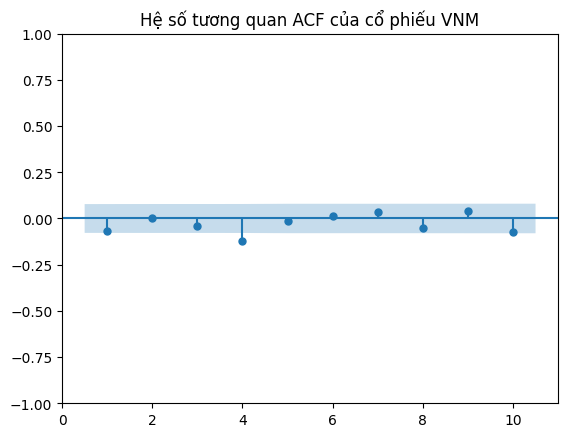

In [22]:
for code in ['HPG','VNM']:
    sgt.plot_acf(df_train[code], lags= 10, zero=False)
    plt.title('Hệ số tương quan ACF của cổ phiếu {}'.format(code))
    plt.show()

Hệ số tương quan ACF là căn cứ để lựa chọn lag cho mô hình MA, hệ số tương quan càng lớn, chứng tỏ ảnh hưởng của dữ liệu trong quá khứ đến giá cổ phiếu hiện tại càng nhiều. Dựa vào mô hình trên, ta thấy lags phù hợp với mô hình tương ứng là
- HPG: 9
- VNM: 4

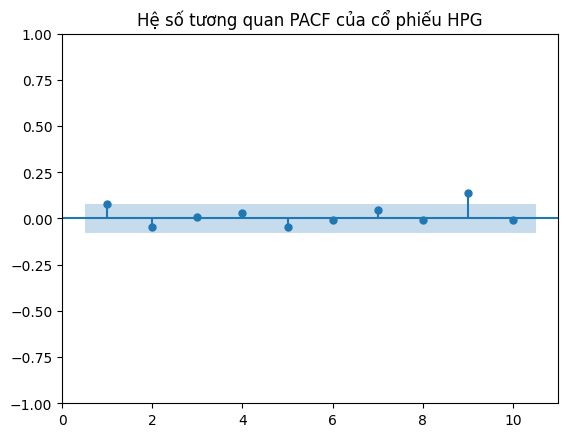

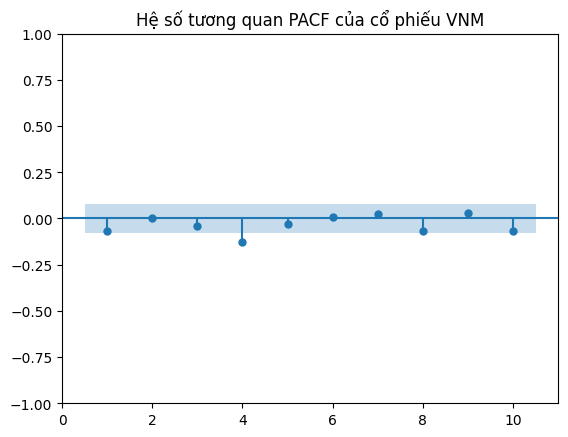

In [23]:
for code in ['HPG','VNM']:
    sgt.plot_pacf(df_train[code], lags= 10, zero=False)
    plt.title('Hệ số tương quan PACF của cổ phiếu {}'.format(code))
    plt.show()

Hệ số tương quan PACF là căn cứ để lựa chọn lag cho mô hình AR, hệ số tương quan càng lớn, chứng tỏ ảnh hưởng của dữ liệu trong quá khứ đến giá cổ phiếu hiện tại càng nhiều. Dựa vào mô hình trên, ta thấy lags phù hợp với mô hình tương ứng là
- HPG: 9
- VNM: 4

Để lựa chọn tham số lagar, lagma tự động cho mô hình, ta sẽ lựa chọn lag mà tại đó, giá trị tuyệt đối của hệ số tương quan đối với dữ liệu hiện tại là cao nhất

In [24]:
#Select lag_ar
def sl_lagar(array):
    corr = sgt.pacf(array, nlags=10)
    n = abs(corr[1:]).argmax()+1
    return n

lagar = dict()
for code in df_train:
    lagar[code] = sl_lagar(df_train[code])
lagar

{'STB': 2,
 'VIC': 2,
 'SSI': 3,
 'MSN': 3,
 'FPT': 7,
 'HAG': 4,
 'KDC': 1,
 'EIB': 1,
 'DPM': 5,
 'VNM': 4,
 'REE': 4,
 'OGC': 1,
 'IJC': 1,
 'VCB': 3,
 'PNJ': 3,
 'BVH': 4,
 'ITA': 1,
 'HPG': 9,
 'CTG': 2,
 'SJS': 1,
 'QCG': 1,
 'PVD': 5,
 'CII': 1,
 'SBT': 7,
 'VSH': 4,
 'KDH': 2,
 'DIG': 1,
 'GMD': 3}

In [25]:
def sl_lagma(array):
    corr = sgt.acf(array, nlags=10)
    n = abs(corr[1:]).argmax()+1
    return n

lagma = dict()
for code in df_train:
    lagma[code] = sl_lagma(df_train[code])
lagma

{'STB': 2,
 'VIC': 2,
 'SSI': 3,
 'MSN': 3,
 'FPT': 7,
 'HAG': 4,
 'KDC': 1,
 'EIB': 1,
 'DPM': 5,
 'VNM': 4,
 'REE': 4,
 'OGC': 1,
 'IJC': 1,
 'VCB': 3,
 'PNJ': 3,
 'BVH': 4,
 'ITA': 1,
 'HPG': 9,
 'CTG': 2,
 'SJS': 1,
 'QCG': 1,
 'PVD': 5,
 'CII': 1,
 'SBT': 7,
 'VSH': 10,
 'KDH': 2,
 'DIG': 1,
 'GMD': 3}

Dựa vào kết quả của mô hình trên, và so sánh các phân tích về ACF và PACF của 2 cổ phiếu HPG và VNM, ta thấy lựa chọn biến tự động cho 2 mô hình đã lấy đúng giá trị so với giá trị mà học viên đã phân tích

#### b. Mô hình AR

Bài toán đặt ra ban đầu: Nhà đầu tư có 300.000.000 VND, muốn dựa vào mô hình để lựa chọn các cổ phiếu tối có mức lãi suất tối ưu nhất với biến động thấp nhất. Vì vậy tiêu chí lựa chọn cổ phiếu trong trường hợp này là các cố phiếu có lãi suất cao nhất và mức sai lệch khi tính theo chỉ số msle là thấp hơn 0.0001 (Mức 0.0001 là mức mlse thấp hơn mức trung bình của các cổ phiếu trong dữ liệu)

Ta tiến hành huấn luyện mô hình AR, tính toán lợi nhuận dự đoán và mức sai lệch mlse của các cổ phiếu như sau:

In [26]:
def modelar(df_train,df_test):
    returnmd = df_test.copy()
    test = dict()
    testmd = dict()
    for code in df_train:
        model = ARIMA(df_train[code], order=(1,0,0))
        result = model.fit()
        returnmd[code] = result.predict(start=len(df_train[code]), end=len(df_train[code])+6)
        testmd[code] = metrics.mean_squared_log_error(df_test[code]+1, returnmd[code]+1)
    df_predict_return = returnmd + 1
    for i in range(1, 7):
        df_predict_return.iloc[i] = df_predict_return.iloc[i]*df_predict_return.iloc[i-1]
    result_ar = df_predict_return.iloc[6].to_dict()
    test['msle'] = testmd
    test['Return'] = result_ar
    return pd.DataFrame(test)

In [27]:
result1 = dict()
result1['msle'] = modelar(df_train, df_test)['msle']
result1['Return'] = modelar(df_train1, df_test1)['Return']
resultar = pd.DataFrame(result1)

Tiếp theo, ta tính lợi nhuận của các cổ phiếu sau 7 ngày:

In [28]:
df_itractual = (df_close/df_close.shift(7)).iloc[-1]
df_itractual.sort_values()

OGC    0.948081
VCB    0.952381
QCG    0.959184
ITA    0.971930
VIC    0.979439
HAG    0.983811
EIB    0.997596
SJS    0.997636
VNM    1.006051
REE    1.006410
PNJ    1.009615
FPT    1.011110
MSN    1.011749
BVH    1.014756
VSH    1.015873
STB    1.017241
KDC    1.018605
CTG    1.019298
KDH    1.026059
CII    1.031519
SBT    1.033333
HPG    1.036247
DPM    1.036810
PVD    1.037736
GMD    1.045455
SSI    1.047350
IJC    1.059882
DIG    1.098558
Name: 2023-06-27 00:00:00, dtype: float64

Ta viết hàm lựa chọn cổ phiếu dựa theo các tiêu chí ban đã đề ra là 3 cổ phiếu có lãi suất cao nhất với mức độ sai số mlse dưới 0.0001

In [29]:
def select_cp(result, df_itractual):
    select_cp = result[result['msle']<0.00004].sort_values('Return', ascending=False).head(3)
    x = 0
    for code in select_cp.index:
        x += 100000000 * df_itractual[code]
    print('Số cổ phiếu lựa chọn mua là: {}'.format(', '.join(list(select_cp.index))))
    print('Số tiền còn lại sau 7 ngày là {} VND'.format(format(int(x),",")))
    return x

Tiến hành huấn luyện mô hình dựa trên hàm đã viết sẵn

Lựa chọn cổ phiếu dựa trên kết quả ban đầu

In [30]:
valuesar = select_cp(resultar, df_itractual)

Số cổ phiếu lựa chọn mua là: VSH, DPM, FPT
Số tiền còn lại sau 7 ngày là 306,379,302 VND


In [31]:
resultar.loc[['VSH', 'DPM', 'FPT']]

,msle,Return
VSH,0.000007,1.012523
DPM,0.000020,1.012042
FPT,0.000018,1.008900


Ta thấy, mô hình cổ phiếu hiện tại chưa thật sự hiệu quả, khi nhà đầu tư không thu được lợi nhuận từ việc lựa chọn các cổ phiếu theo mô hình.

In [32]:
result = dict()
result_ar = dict()
result_ar['msle'] = resultar.mean()['msle']
result_ar['Values'] = valuesar
result['AR'] = result_ar

#### c. Mô hình MA
Ta viết hàm huấn luyện dựa theo mô hình MA, đồng thời tính toán lợi nhuận sau 7 ngày và sai số của mô hình theo chỉ số msle như sau:

In [33]:
def modelma(df_train,df_test):
    return_ar = df_test.copy()
    test = dict()
    test_ar = dict()
    for code in df_train:
        model = ARIMA(df_train[code], order=(0,0,1))
        result = model.fit()
        return_ar[code] = result.predict(start=len(df_train[code]), end=len(df_train[code])+6)
        test_ar[code] = metrics.mean_squared_log_error(df_test[code]+1, return_ar[code]+1)
        
    df_predict_return = return_ar + 1
    for i in range(1, 7):
        df_predict_return.iloc[i] = df_predict_return.iloc[i]*df_predict_return.iloc[i-1]
    result_ar = df_predict_return.iloc[6].to_dict()
    test['msle'] = test_ar
    test['Return'] = result_ar
    return pd.DataFrame(test)

Tiến hành huấn luyện mô hình

In [34]:
result_ma = dict()
result_ma['msle'] = modelma(df_train,df_test)['msle']
result_ma['Return'] = modelma(df_train1,df_test1)['Return']
result_ma = pd.DataFrame(result_ma)

Dựa vào mô hình vừa huấn luyện được, ta tiến hành lựa chọn cổ phiếu theo các tiêu chí đã đề ra và tính toán lợi nhuận

In [35]:
valuesma = select_cp(result_ma, df_itractual)

Số cổ phiếu lựa chọn mua là: VSH, DPM, FPT
Số tiền còn lại sau 7 ngày là 306,379,302 VND


In [36]:
result_ma.loc[['VSH', 'DPM', 'FPT']]

,msle,Return
VSH,0.000007,1.012481
DPM,0.000020,1.012060
FPT,0.000018,1.008897


Theo kết quả nhận được, ta thấy được rằng mô hình MA chưa thật sự hiệu quả khi nhà đầu tư vẫn đang chưa có lợi nhuận khi đầu tư cổ phiếu dựa theo mô hình nhận được

In [37]:
resultma = dict()
resultma['msle'] = result_ma.mean()['msle']
resultma['Values'] = valuesma
result['MA'] = resultma

#### d. Mô hình ARIMA
Dựa trên các phân tích về ACF và PACF, và kết quả các mô hình trước, ta thấy việc lựa chọn chỉ số mặc định là 1 khi tính toán các mô hình MA hay AR là chưa hợp lý. Vì vậy, số biến giá trị quá khứ và giá trị hiện tại, ta sẽ thực hiện dựa trên hệ số lags_ma và lags_ar để tính toán và áp dụng vào mô hình ARIMA để tính toán dữ liệu

In [38]:
def modelarima(df_train, df_test, lagar, lagma):
    return_ar = df_test.copy()
    test = dict()
    test_ar = dict()
    for code in df_train:
        model = ARIMA(df_train[code], order=(lagar[code],0,lagma[code]))
        result = model.fit()
        return_ar[code] = result.predict(start=len(df_train[code]), end=len(df_train[code])+6)
        test_ar[code] = metrics.mean_squared_log_error(df_test[code]+1, return_ar[code]+1)   
    df_predict_return = return_ar + 1
    for i in range(1, 7):
        df_predict_return.iloc[i] = df_predict_return.iloc[i]*df_predict_return.iloc[i-1]
    result_ar = df_predict_return.iloc[6].to_dict()
    test['msle'] = test_ar
    test['Return'] = result_ar
    return pd.DataFrame(test)

Huấn luyện mô hình ARIMA dựa vào hàm và các tham số đã tính.

In [39]:
result_arima = dict()
result_arima['msle'] = modelarima(df_train,df_test, lagar, lagma)['msle']
result_arima['Return'] = modelarima(df_train1,df_test1, lagar, lagma)['Return']
result_arima = pd.DataFrame(result_arima)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible st

Lựa chọn cổ phiếu dựa trên các tiêu chí đã đề ra ban đầu

In [40]:
valuesarima = select_cp(result_arima,df_itractual)

Số cổ phiếu lựa chọn mua là: HPG, VSH, BVH
Số tiền còn lại sau 7 ngày là 306,687,630 VND


In [41]:
result_arima.loc[['HPG', 'VSH', 'BVH']]

,msle,Return
HPG,0.000035,1.033915
VSH,0.000008,1.012430
BVH,0.000027,1.011746


Dựa vào kết quả trên, ta thấy mô hình ARIMA đem lại lợi nhuận so với các mô hình trước, cho thấy sự hiệu quả khi sử dụng các tham số p, d, q một cách hiệu quả

In [42]:
resultarima = dict()
resultarima['msle'] = result_arima.mean()['msle']
resultarima['Values'] = valuesarima
result['ARIMA'] = resultarima

#### e. Tùy chọn nâng cao với mô hình Auto ARIMA
Về bản chất, mô hình Auto_ARIMA thực chất là mô hình ARIMA nhưng các tham số được lựa chọn tự động, và từ đó, chọn ra mô hình có kết quả tốt nhất trong các mô hình. Ngoài ra, mô hình Auto_ARIMA còn tính cả yếu tố mùa vụ, nghĩa là quy luật biến thiên của dữ liệu trong quá khứ để tăng thêm dữ liệu khi huấn luyện mô hình.

Để tăng thêm độ hiệu quả của mô hình, ta thêm yếu tố mùa vụ, dựa vào quan sát của nhà đầu tư, để theo dõi dữ liệu thay đổi theo tuần, ta chọn yếu tố mùa vụ là 5, với độ tin cậy của mô hình là 90%, tức alpha = 0.1, các chỉ số p, d, q thay đổi dao động từ 1 - 20

In [43]:
def modelautoarima(df_train, df_test):
    return_ar = df_test.copy()
    test = dict()
    test_ar = dict()
    for code in df_train:
        model = auto_arima(df_train[code], m = 5, max_p= 20, max_d=5, max_q=20, n_fits=50, alpha=0.1)
        return_ar[code] = model.predict(n_periods=7)
        test_ar[code] = metrics.mean_squared_log_error(df_test[code]+1, return_ar[code]+1)
    df_predict_return = return_ar.copy()+1
    for i in range(1, 7):
        df_predict_return.iloc[i] = df_predict_return.iloc[i]*df_predict_return.iloc[i-1]
    result_ar = df_predict_return.iloc[6].to_dict()
    test['msle'] = test_ar
    test['Return'] = result_ar
    return pd.DataFrame(test)

Tiến hành huấn luyện mô hình Auto_ARIMA dựa trên các tham số đã lựa chọn

In [44]:
rsautoarima = dict()
rsautoarima['msle'] = modelautoarima(df_train, df_test)['msle']
rsautoarima['Return'] = modelautoarima(df_train1, df_test1)['Return']
rsautoarima = pd.DataFrame(rsautoarima)

Lựa chọn cổ phiếu dựa theo các tiêu chí nhà đầu tư đã đề ra ban đầu

In [45]:
valuesautoarima = select_cp(rsautoarima, df_itractual)    

Số cổ phiếu lựa chọn mua là: VSH, KDC, HPG
Số tiền còn lại sau 7 ngày là 307,072,500 VND


In [46]:
rsautoarima.loc[['VSH','KDC','HPG']]

,msle,Return
VSH,0.000007,1.011990
KDC,0.000001,1.006409
HPG,0.000028,1.001070


Dựa theo kết quả thu được, ta thấy lợi nhuận thu được từ mô hình Auto ARIMA cao hơn các mô hình còn lại, chứng tỏ độ hiệu quả của mô hình là cao hơn các mô hình khác

In [47]:
resultautoarima = dict()
resultautoarima['msle'] = rsautoarima.mean()['msle']
resultautoarima['Values'] = valuesautoarima
result['Auto_ARIMA'] = resultautoarima

#### Mô hình LSTM

Mô hình LSTM là mô hình dự đoán giá trị của biến mục tiêu theo mô hình mạng nơ ron, là mô hình cải tiến của RNN nhằm giải quyết vấn đề nhớ các bước dài của RNN. 

Đầu tiên, ta viết hàm để tách các dữ liệu chuỗi thời gian thành các biến dữ liệu chuỗi thời gian thành các biến độc lập x và biến phụ thuộc y với biến đầu vào là giá của cổ phiếu trong 5 ngày gần nhất

In [48]:
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

Sau đó, ta tiến hành huấn luyện mô hình các cổ phiếu dựa vào dữ liệu giá cổ phiểu trên thị trường VN30

In [49]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (5, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training = dict()
testing = dict()
trainX = dict()
trainY = dict()
testX = dict()
testY = dict()
predicted_stock_price = dict()
for code in df_train:
    training[code] = sc.fit_transform(df_train[code].values.reshape(-1,1))
    testing[code] = sc.fit_transform(df_new[code].iloc[size-6:].values.reshape(-1,1))
    trainX[code], trainY[code] = create_dataset(training[code], 5)
    testX[code], testY[code] = create_dataset(testing[code], 5)
    regressor.fit(trainX[code], trainY[code], epochs = 10, batch_size = 32)
    predicted_stock_price[code] = regressor.predict(testX[code])
    predicted_stock_price[code] = sc.inverse_transform(predicted_stock_price[code]).reshape(1,-1)[0]
result_lstm = pd.DataFrame(predicted_stock_price, index=df_test1.index)

Epoch 1/10
20/20 [==============================] - 9s 21ms/step - loss: 0.1217
Epoch 2/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0447
Epoch 3/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0429
Epoch 4/10
20/20 [==============================] - 0s 22ms/step - loss: 0.0421
Epoch 5/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0417
Epoch 6/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0418
Epoch 7/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0442
Epoch 8/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0435
Epoch 9/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0416
Epoch 10/10
1/1 [==============================] - 2s 2s/step
Epoch 1/10
20/20 [==============================] - 0s 22ms/step - loss: 0.0203
Epoch 2/10
20/20 [==============================] - 0s 22ms/step - loss: 0.0198
Epoch 3/10
20/20 [==============================] - 1s 25m

In [51]:
msle_lstm = dict()
return_lstm = dict()
test_lstm = dict()
for code in result_lstm:
    msle_lstm[code] = metrics.mean_squared_log_error(df_test1[code]+1, result_lstm[code]+1)
result_lstm1 = result_lstm.copy() + 1
for i in range(1, 7):
    result_lstm1.iloc[i] = result_lstm1.iloc[i]*result_lstm1.iloc[i-1]
test_lstm['msle'] = msle_lstm
test_lstm['Return'] = result_lstm1.iloc[-1].to_dict()
df = pd.DataFrame(test_lstm)

In [52]:
values_lstm = select_cp(df, df_itractual)

Số cổ phiếu lựa chọn mua là: VNM, SBT, GMD
Số tiền còn lại sau 7 ngày là 308,483,931 VND


In [53]:
df.loc[['VNM', 'GMD', 'SBT']]

,msle,Return
VNM,0.000028,1.066358
GMD,0.000025,1.062187
SBT,0.000038,1.063800


In [54]:
resul_lstm = dict()
resul_lstm['msle'] = df.mean()['msle']
resul_lstm['Values'] = values_lstm
result['LSTM'] = resul_lstm

## IV. Tổng hợp kết quả và đưa ra kết luận
### 1. Tổng hợp kết quả
Trong chương trước chúng ta đã thực nghiệm lần lượt các mô hình AR, MA, ARIMA và Auto ARMIA cho các cổ phiếu HPG và VNM trong giai đoạn 2021 đến này. Kết quả rmsle đánh giá mức độ hiệu quả của mô hình như sau:

In [55]:
data = pd.DataFrame(result).T
data

,msle,Values
AR,0.000114,3.063793e+08
MA,0.000116,3.063793e+08
ARIMA,0.000113,3.066876e+08
Auto_ARIMA,0.000112,3.070725e+08
LSTM,0.000094,3.084839e+08


Ta thấy, dựa vào chỉ số đánh giá, thì mô hình LSTM đưa ra kết quả tốt nhất. Đồng thời, mô hình này cũng đem lại lợi nhuận cao nhất cho nhà đầu tư, điều này cho thấy độ hiệu quả của mô hình LSTM cao hơn các mô hình còn lại

In [56]:
resultfn = result_lstm[['SSI', 'DPM', 'STB']]

Ta chuyển kết quả từ lợi nhuận thu được mỗi ngày sang giá cả của mỗi ngày như sau:


In [57]:
resultfn1 = resultfn.copy() + 1
price = df_close[['SSI', 'DPM', 'STB']].iloc[size]
for i in range(1,7):
    resultfn1.iloc[i] = resultfn1.iloc[i]*resultfn1.iloc[i-1]
for code in ['SSI', 'DPM', 'STB']:
    resultfn1[code] = resultfn1[code] * price[code]
resultfn1

,SSI,DPM,STB
Date,,,
2023-06-19,25547.263672,33002.078125,29236.947266
2023-06-20,25972.953125,33398.238281,29452.675781
2023-06-21,26406.798828,33793.261719,29666.816406
2023-06-22,26853.062500,34192.183594,29888.003906
2023-06-23,27312.798828,34601.949219,30146.761719
2023-06-26,27780.736328,35029.742188,30430.656250
2023-06-27,28253.337891,35470.085938,30667.548828


Tiếp theo, để so sánh mô hình LSTM với các mô hình khác, ta vẽ đồ thị so sánh giá thực tế và giá dự đoán của 3 cổ phiếu được mô hình LSTM dự đoán

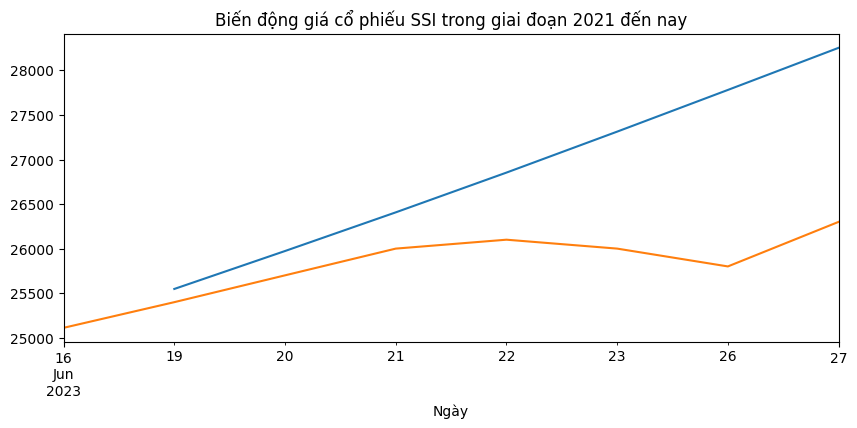

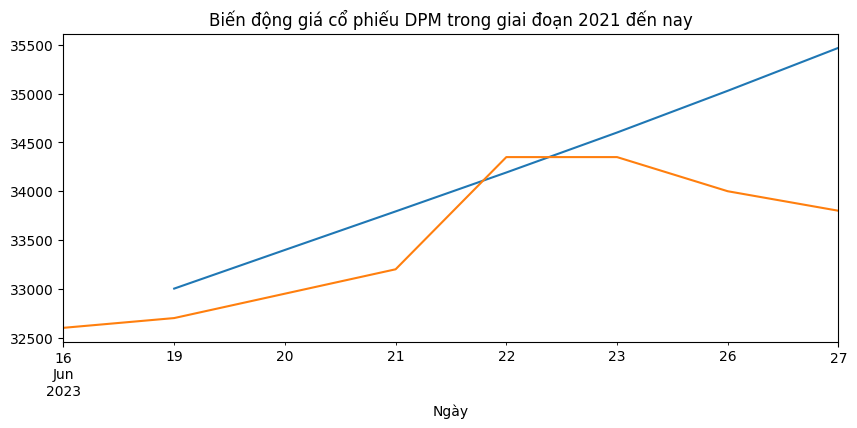

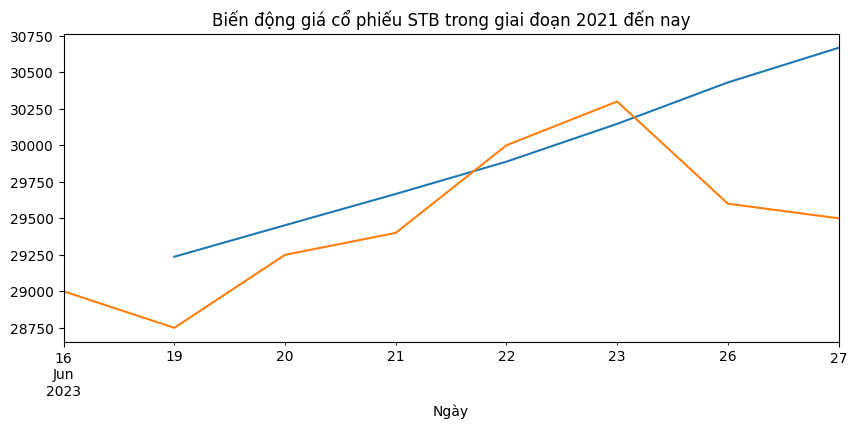

In [58]:
for code in resultfn1:
    plt.figure(figsize= (10, 4))
    resultfn1[code].plot(kind='line',title='predict' + code)
    df_close[code].iloc[size:].plot(kind='line',title='actual' + code)
    plt.title('Biến động giá cổ phiếu {} trong giai đoạn 2021 đến nay'.format(code))
    plt.xlabel('Ngày')
    plt.show()

Dựa vào dữ liệu trên, ta thấy mô hình dự đoán khá chuẩn xu hướng của cổ phiếu khi xu hướng chung trong 7 ngày của mô hình dự đoán và mô hình thực tế đều có xu hướng tăng. Tuy nhiên, đối với các ngày có xu hướng tăng, giảm bất thường do sự đảo chiểu của thị trường thì mô hình dự đoán vẫn chưa theo kịp thay đổi thực tế. Điều này cho thấy, dự đoán bằng mô hình có thể chưa chính xác khi giá cổ phiếu tăng, giảm đột biến

### 2. Kết luận
Trong giai đoạn mà đa số các cổ phiếu đều có xu hướng giảm, kết quả lựa chọn của mô hình vẫn đem lại lợi nhuận cho nhà đầu tư, điều này cho thấy mô hình dự đoán tương đối chính xác. Tuy nhiên, đối với những ngày có biến động cao, mô hình vẫn chưa thể dự đoán chính xác giá trị thực tế. Từ các mô hình thực nghiệm trên, ta có thể đánh giá tính phù họp của mô hình như sau:

Ưu điểm:
- Mô hình dựa vào dữ liệu quá khứ để dự đoán biến động của giá trị hiện tại và tương lai, vì vậy, việc thu thập dữ liệu không quá khó khăn.
- Độ chính xác của mô hình tương đối ổn định, xu hướng tăng/giảm của cổ phiếu được dự đoán tương đối chính xác.

Nhược điểm:
- Mô hình chưa dự đoán chính xác được giá trị thực tế tại các ngày có biến động lớn
- Mô hình chưa xét đến các yếu tố thời vụ và chu kỳ của dữ liệu
- Mô hình chưa xem xét các thông tin bên ngoài. Đặc biệt, trong giai đoạn 2021 đến nay, có khá nhiều thông tin bên lề tác động mạnh đến giá cổ phiếu Việt Nam và thế giới như dịch bệnh, chiến tranh...

### PHỤ LỤC: ỨNG DỤNG MÔ HÌNH DỮ LIỆU CHUỖI THỜI GIAN ĐỂ DỰ ĐOÁN GIÁ CỔ PHIẾU TRONG GIAI ĐOẠN 2013 - 2016

Để đánh gía lại tính chính xác của các mô hình, ta tiến hành dự đoán giá cổ phiếu trên thị trường New York trong giai đoạn 2013 - 2016

#### I. THU THẬP DỮ LIỆU

Đầu tiên, ta thu thập dữ liệu trên thị trường New York trong giai đoạn 2013 - 2016

In [59]:
df_close1 = pd.read_csv('DataNY.csv')
df_close1['date'] = df_close1['date'].astype('datetime64[ns]')
df_close1.set_index('date', inplace=True)
df_close1.tail()

,BSX,AMAT,KO,XOM,VZ,FOXA,RF,CHK,YHOO,ORCL,...,C,HPQ,PFE,CSCO,INTC,MSFT,GE,F,AAPL,BAC
date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,21.709999,32.900002,41.599998,90.709999,53.680000,29.379999,14.76,7.44,41.660000,38.779999,...,60.990002,15.10,32.480000,30.530001,36.970001,63.840002,31.879999,12.46,116.519997,22.600000
2016-12-27,21.760000,33.330002,41.610001,90.750000,53.639999,29.540001,14.94,7.59,41.919998,38.820000,...,61.090000,15.21,32.529999,30.680000,37.070000,64.279999,31.900000,12.39,117.260002,22.610001
2016-12-28,21.920001,32.900002,41.389999,90.300003,53.439999,29.450001,15.03,7.23,41.730000,38.680000,...,60.040001,14.94,32.349998,30.420000,36.630001,64.990002,31.700001,12.25,116.760002,22.330000
2016-12-29,21.700001,32.660000,41.599998,90.349998,53.740002,29.480001,15.17,7.16,41.339999,38.689999,...,59.380001,14.94,32.490002,30.459999,36.660000,64.900002,31.709999,12.23,116.730003,22.000000
2016-12-30,21.829999,32.270000,41.459999,90.260002,53.380001,30.040001,15.36,7.02,41.869998,38.450001,...,59.430000,14.84,32.480000,30.219999,36.270000,65.139999,31.600000,12.13,115.820000,22.100000


Tiếp đó, ta tiến hành thay đổi dữ liệu ban đầu thành mức giá tăng/giảm (%) so với ngày hôm trước

In [60]:
# Set index is working date
df_cl30 = df_close1.asfreq('b')
df_cl30 = df_cl30.fillna(method='ffill')

# Transform data
df_new1= (df_cl30/df_cl30.shift(1)-1).dropna(axis=0)

# Split train/test data
size = len(df_new1)-7
df_train2 = df_new1.iloc[:size-7]
df_test2 = df_new1.iloc[size-7:size]
df_train3 = df_new1.iloc[:size]
df_test3 = df_new1.iloc[size:]

In [61]:
lagar1 = dict()
for code in df_train2:
    lagar1[code] = sl_lagar(df_train2[code])
lagar1

{'BSX': 1,
 'AMAT': 8,
 'KO': 1,
 'XOM': 5,
 'VZ': 6,
 'FOXA': 5,
 'RF': 5,
 'CHK': 2,
 'YHOO': 5,
 'ORCL': 1,
 'FCX': 8,
 'EBAY': 1,
 'WFC': 1,
 'JPM': 1,
 'T': 3,
 'MU': 5,
 'C': 5,
 'HPQ': 2,
 'PFE': 9,
 'CSCO': 4,
 'INTC': 6,
 'MSFT': 5,
 'GE': 3,
 'F': 5,
 'AAPL': 3,
 'BAC': 5}

In [62]:
lagma1 = dict()
for code in df_train2:
    lagma1[code] = sl_lagma(df_train2[code])
lagma1

{'BSX': 1,
 'AMAT': 8,
 'KO': 1,
 'XOM': 5,
 'VZ': 6,
 'FOXA': 5,
 'RF': 5,
 'CHK': 2,
 'YHOO': 5,
 'ORCL': 1,
 'FCX': 8,
 'EBAY': 1,
 'WFC': 1,
 'JPM': 1,
 'T': 3,
 'MU': 5,
 'C': 5,
 'HPQ': 2,
 'PFE': 9,
 'CSCO': 4,
 'INTC': 6,
 'MSFT': 5,
 'GE': 3,
 'F': 5,
 'AAPL': 3,
 'BAC': 5}

#### 1. MÔ HÌNH AR

Đầu tiên, ta thử huấn luyện dữ liệu với mô hình AR

In [63]:
resultar1 = dict()
resultar1['msle'] = modelar(df_train2, df_test2)['msle']
resultar1['Return'] = modelar(df_train3, df_test3)['Return']
resultar1 = pd.DataFrame(resultar1)

Tiếp theo, ta tính tỷ suất lợi nhuận sau 7 ngày của các cổ phiếu đang dự đoán

In [64]:
df_itractual1 = (df_cl30/df_cl30.shift(7)).iloc[-1]
df_itractual1.sort_values()

FCX     0.938790
CHK     0.944818
F       0.959652
BAC     0.976580
C       0.978272
HPQ     0.980185
INTC    0.980800
GE      0.983504
MU      0.987366
WFC     0.989230
AAPL    0.989407
ORCL    0.990214
AMAT    0.990485
CSCO    0.993425
JPM     0.994697
KO      0.997354
XOM     0.999779
PFE     1.002469
T       1.004013
VZ      1.007740
YHOO    1.012575
BSX     1.016294
MSFT    1.025181
EBAY    1.045300
FOXA    1.055888
RF      1.057123
Name: 2016-12-30 00:00:00, dtype: float64

Dự đoán giá trị còn lại của cổ phiếu sau 7 ngày

In [65]:
valuesar1 = select_cp(resultar1, df_itractual1)

Số cổ phiếu lựa chọn mua là: AAPL, MU, EBAY
Số tiền còn lại sau 7 ngày là 302,207,325 VND


In [66]:
resultny = dict()
result_ar1 = dict()
result_ar1['mlse'] = resultar1['msle'].mean()
result_ar1['Value'] = valuesar1
resultny['AR'] = result_ar1

#### II. MÔ HÌNH MA

Tiếp theo, ta tiến hành huấn luyện dữ liệu theo mô hình MA

In [67]:
resultma1 = dict()
resultma1['msle'] = modelma(df_train2, df_test2)['msle']
resultma1['Return'] = modelma(df_train3, df_test3)['Return']
resultma1 = pd.DataFrame(resultma1)

In [68]:
valuesma1 = select_cp(resultma1, df_itractual1)

Số cổ phiếu lựa chọn mua là: AAPL, MU, EBAY
Số tiền còn lại sau 7 ngày là 302,207,325 VND


In [69]:
result_ma1 = dict()
result_ma1['mlse'] = resultma1['msle'].mean()
result_ma1['Value'] = valuesma1
resultny['MA'] = result_ma1

#### III. MÔ HÌNH ARIMA

In [70]:
resultarima1 = dict()
resultarima1['msle'] = modelarima(df_train2, df_test2, lagar1, lagma1)['msle']
resultarima1['Return'] = modelarima(df_train3, df_test3, lagar1, lagma1)['Return']
resultarima1 = pd.DataFrame(resultarima1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary st

In [71]:
valuesarima1 = select_cp(resultarima1, df_itractual1)

Số cổ phiếu lựa chọn mua là: EBAY, AAPL, BSX
Số tiền còn lại sau 7 ngày là 305,100,106 VND


Ta có thể thấy, mô hình ARIMA đưa ra kết quả tốt hơn 2 mô hình đã được đưa ra trước đó

In [72]:
result_arima1 = dict()
result_arima1['mlse'] = resultarima1['msle'].mean()
result_arima1['Value'] = valuesarima1
resultny['ARIMA'] = result_arima1

#### IV. MÔ HÌNH AUTO ARIMA

Để tìm được mô hình hoàn chỉnh nhất, ta tiến hành huấn luyện mô hình ARIMA và với p, d, q thay đổi như sau

In [73]:
rsautoarima1 = dict()
rsautoarima1['msle'] = modelautoarima(df_train2, df_test2)['msle']
rsautoarima1['Return'] = modelautoarima(df_train3, df_test3)['Return']
rsautoarima1 = pd.DataFrame(rsautoarima1)

In [74]:
vl_autoarima = select_cp(rsautoarima1,df_itractual1)

Số cổ phiếu lựa chọn mua là: AAPL, EBAY, YHOO
Số tiền còn lại sau 7 ngày là 304,728,236 VND


In [75]:
result_autoarima1 = dict()
result_autoarima1['mlse'] = rsautoarima1['msle'].mean()
result_autoarima1['Value'] = vl_autoarima
resultny['Auto_ARIMA'] = result_autoarima1

#### V. MÔ HÌNH LSTM

In [76]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training = dict()
testing = dict()
trainX = dict()
trainY = dict()
testX = dict()
testY = dict()
predicted_stock_price = dict()
for code in df_train2:
    training[code] = sc.fit_transform(df_train3[code].values.reshape(-1,1))
    testing[code] = sc.fit_transform(df_new1[code].iloc[size-6:].values.reshape(-1,1))
    trainX[code], trainY[code] = create_dataset(training[code], 5)
    testX[code], testY[code] = create_dataset(testing[code], 5)
    regressor.fit(trainX[code], trainY[code], epochs = 10, batch_size = 32)
    predicted_stock_price[code] = regressor.predict(testX[code])
    predicted_stock_price[code] = sc.inverse_transform(predicted_stock_price[code]).reshape(1,-1)[0]
result_lstm = pd.DataFrame(predicted_stock_price, index=df_test3.index)

Epoch 1/10
15/57 [======>.......................] - ETA: 1s - loss: 0.0059

57/57 [==============================] - 2s 29ms/step - loss: 0.0059
Epoch 2/10
57/57 [==============================] - 2s 27ms/step - loss: 0.0058
Epoch 3/10
57/57 [==============================] - 1s 23ms/step - loss: 0.0058
Epoch 4/10
57/57 [==============================] - 1s 24ms/step - loss: 0.0059
Epoch 5/10
57/57 [==============================] - 1s 24ms/step - loss: 0.0057
Epoch 6/10
57/57 [==============================] - 1s 23ms/step - loss: 0.0059
Epoch 7/10
57/57 [==============================] - 1s 25ms/step - loss: 0.0057
Epoch 8/10
57/57 [==============================] - 1s 24ms/step - loss: 0.0058
Epoch 9/10
57/57 [==============================] - 1s 24ms/step - loss: 0.0058
Epoch 10/10
1/1 [==============================] - 0s 45ms/step
Epoch 1/10
57/57 [==============================] - 1s 24ms/step - loss: 0.0080
Epoch 2/10
57/57 [==============================] - 1s 25ms/step - loss: 0.0063
Epoch 3/10
57/57 [==============================] - 1s 23ms/step - 

In [77]:
msle_lstm = dict()
return_lstm = dict()
test_lstm = dict()
for code in result_lstm:
    msle_lstm[code] = metrics.mean_squared_log_error(df_test3[code]+1, result_lstm[code]+1)
result_lstm1 = result_lstm.copy() + 1
for i in range(1, 7):
    result_lstm1.iloc[i] = result_lstm1.iloc[i]*result_lstm1.iloc[i-1]
test_lstm['msle'] = msle_lstm
test_lstm['Return'] = result_lstm1.iloc[-1].to_dict()
df = pd.DataFrame(test_lstm)

In [78]:
values_lstm = select_cp(df, df_itractual1)

Số cổ phiếu lựa chọn mua là: MSFT, FOXA, BAC
Số tiền còn lại sau 7 ngày là 305,764,828 VND


In [79]:
result_lstm = dict()
result_lstm['mlse'] = df['msle'].mean()
result_lstm['Value'] = values_lstm
resultny['LSTM'] = result_lstm

In [80]:
pd.DataFrame(resultny)

,AR,MA,ARIMA,Auto_ARIMA,LSTM
mlse,3.798799e-05,3.801709e-05,3.773877e-05,3.754017e-05,2.392199e-05
Value,3.022073e+08,3.022073e+08,3.051001e+08,3.047282e+08,3.057648e+08
